In [46]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

df1 = pd.read_csv('./Data/pp_dep_2017_2019.csv', delimiter=';')
G1 = nx.DiGraph()

unique_product_codes = set(df1['HS6_i']).union(set(df1['HS6_j']))

G1.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df1.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['f_ij']
    G1.add_edge(product_i, product_j, weight=weight)


# nx.draw(G1,node_size=50,with_labels=True)

df2 = pd.read_csv('./Data/pp_sim_2017_2019.csv', delimiter=';')
# Add the nodes
G2 = nx.Graph()

# Add the nodes

unique_product_codes = set(df2['HS6_i']).union(set(df2['HS6_j']))

G2.add_nodes_from(unique_product_codes)

# Add the edges
for _, row in df2.iterrows():
    product_i = row['HS6_i']
    product_j = row['HS6_j']
    weight = row['n_ij']
    G2.add_edge(product_i, product_j, weight=weight)

# Define the file path where you want to save the GML file

# Write the graph to the specified file in GML format
nx.write_gml(G1, "dependency.gml")
nx.write_gml(G2, "similarity.gml")

# nx.draw(G2,node_size=50,with_labels=True)


In [4]:
def get_pdf(G):
    all_k = [G.degree(i) for i in G.nodes()]
    k = list(set(all_k)) 
    N = len(G.nodes())
    
    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1  
        Pk.append(c/N)     
    
    return sorted(k), Pk


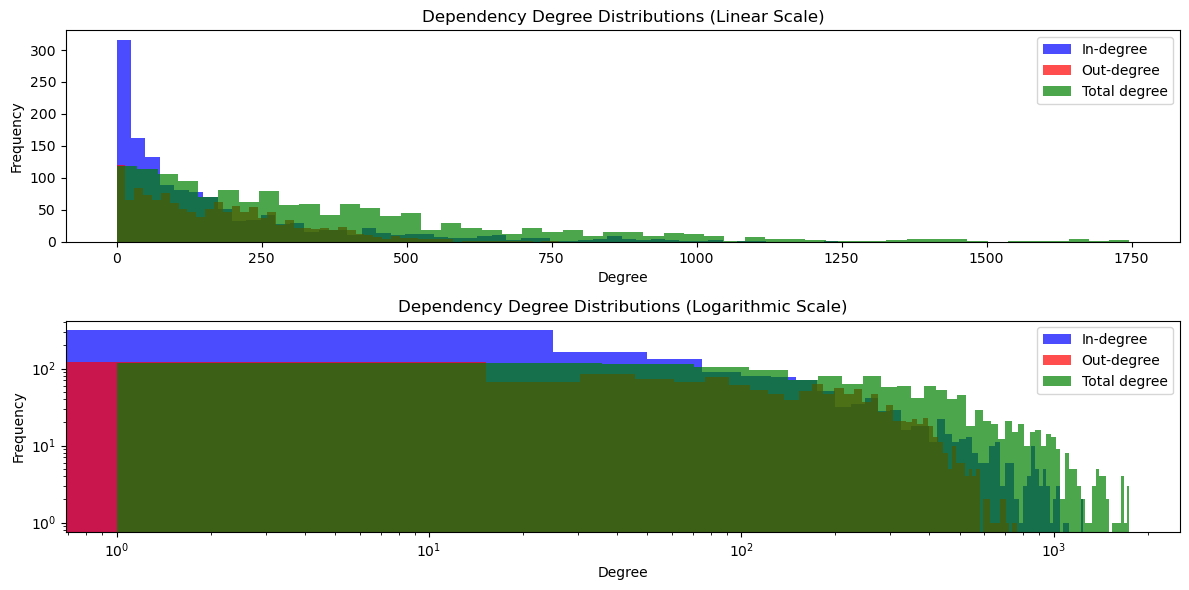

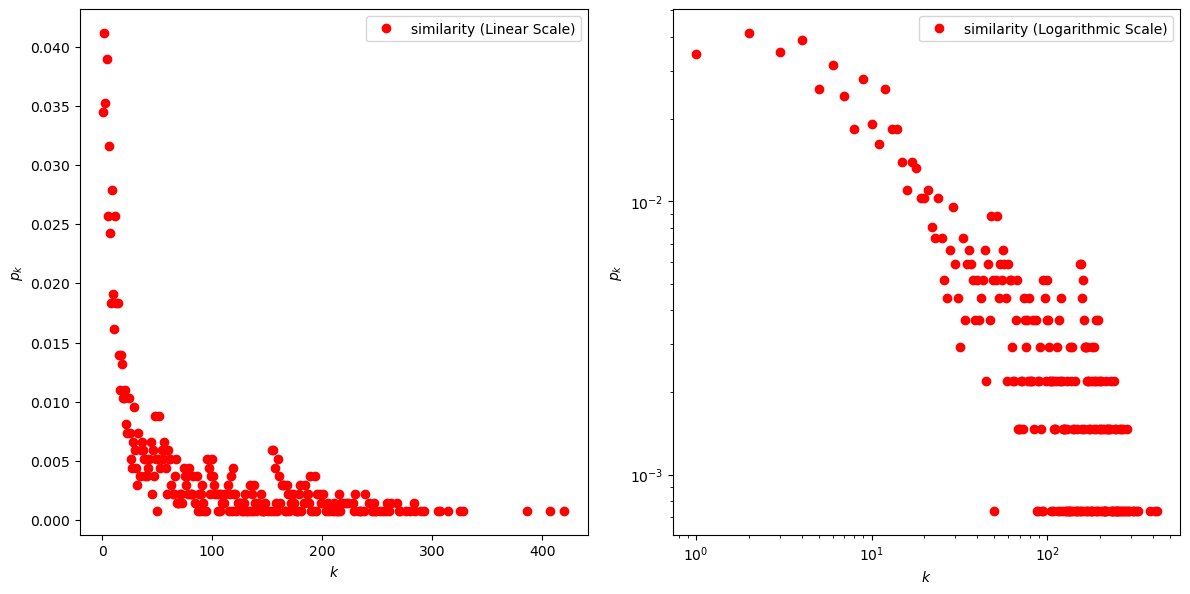

In [28]:

in_degree_sequence = [degree for node, degree in G1.in_degree()]
out_degree_sequence = [degree for node, degree in G1.out_degree()]
total_degree_sequence = [degree for node, degree in G1.degree()]


plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.hist(in_degree_sequence, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.hist(out_degree_sequence, bins=50, color='red', alpha=0.7, label='Out-degree')
plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Dependency Degree Distributions (Linear Scale)')
plt.legend()
plt.tight_layout()


plt.subplot(2, 1, 2)
plt.hist(in_degree_sequence, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.hist(out_degree_sequence, bins=50, color='red', alpha=0.7, label='Out-degree')
plt.hist(total_degree_sequence, bins=50, color='green', alpha=0.7, label='Total degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Dependency Degree Distributions (Logarithmic Scale)')
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




k2, Pk2 = get_pdf(G2)
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(k2, Pk2, 'ro', label='similarity (Linear Scale)')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.tight_layout()

plt.subplot(122)
plt.plot(k2, Pk2, 'ro', label='similarity (Logarithmic Scale)')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.tight_layout()
plt.xscale("log")
plt.yscale("log")



# Similarity

Slope a =  -0.8565436543366024


<Figure size 600x600 with 0 Axes>

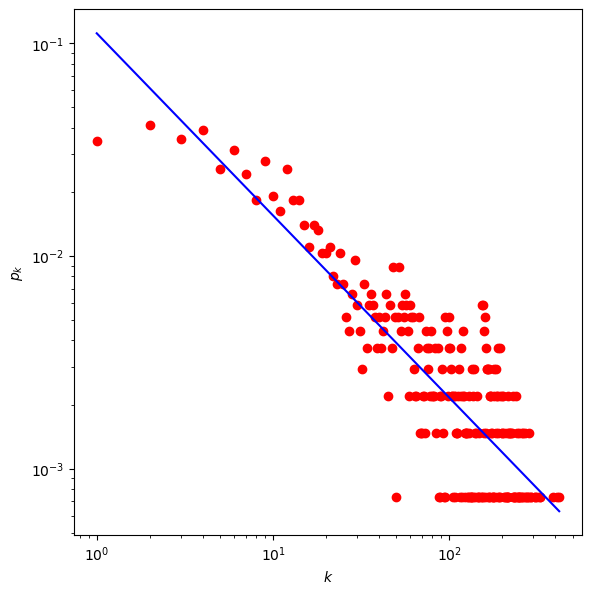

In [36]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

def fit_line(x, a, b):
    return a * x + b

deg2 = dict(G2.degree())

x = np.log10(np.array(k2))
y = np.log10(np.array(Pk2))

# Fit the line
a, b = optimize.curve_fit(fit_line, x, y)[0]
print("Slope a = ", a)

# Generate x values for the fitted line
kmin2, kmax2 = min(deg2.values()), max(deg2.values())
x1 = np.arange(kmin2, kmax2, 0.01)
y1 = (10**b) * (x1 ** a)

# Plot
plt.figure(figsize=(6, 6))
plt.figure(figsize=(6,6))
plt.plot(k2, Pk2, 'ro')
plt.plot(x1, y1, 'b-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.tight_layout()
plt.xscale("log")
plt.yscale("log")
plt.show()


In [37]:
import powerlaw
data = [G2.degree(i) for i in G2.nodes()]
print(max(data))

fit = powerlaw.Fit(data)
print(fit)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

420
Calculating best minimal value for power law fit
kmin: 245.0
gamma: 8.088010355444128
D: 0.06439180901363228


<Axes: >

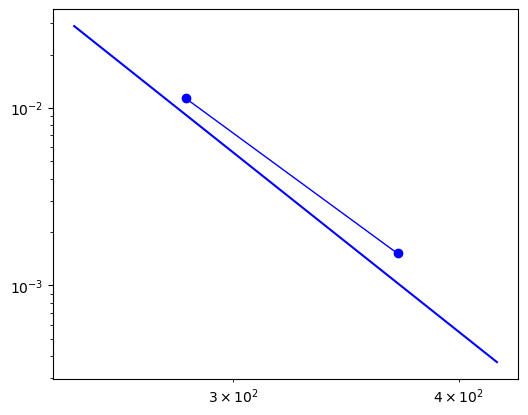

In [38]:
plt.figure(figsize=[6, 4.8])
fig = fit.plot_pdf(marker = 'o', color='b', linewidth=1)
fit.power_law.plot_pdf(color='b', linestyle='-', ax=fig)

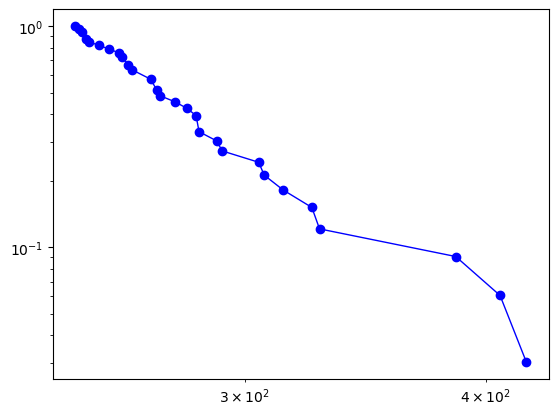

In [39]:
fig = fit.plot_ccdf(marker = 'o', color='b', linewidth=1)

# Dependency

In [43]:
import networkx as nx
import powerlaw

# Assuming you have already created the directed graph G1

# Calculate the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G1), key=len)
G1 = G1.subgraph(largest_scc)

# Calculate average shortest path length and clustering coefficient
avg_shortest_path_length = nx.average_shortest_path_length(G1)
clustering_coefficient = nx.average_clustering(G1)

# Print the values
print("Average Shortest Path Length:", avg_shortest_path_length)
print("Clustering Coefficient:", clustering_coefficient)


Average Shortest Path Length: 1.9617318986107894
Clustering Coefficient: 0.5450395453661172
